In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy import optimize

In [2]:
def fit_norm(x,mu,sigma):
    return st.norm.pdf(x,mu,sigma)

In [96]:
#df = pd.read_csv("Data/COM_velocity.csv")
df = pd.read_csv("Data/COM_velocity_modified.csv")
df.head()

,logv,outcome
0,1.400254,0.721649
1,1.467878,0.721649
2,1.488166,1.185567
3,1.557481,1.159794
4,1.577768,1.932990


In [107]:
logv = (df["logv"][0::2].to_numpy() + df["logv"][1::2].to_numpy())/2

In [108]:
np.mean(df["logv"][1::2].to_numpy() - df["logv"][::2].to_numpy())

0.06782755705832641

In [109]:
percent = (df["outcome"][0::2].to_numpy() + df["outcome"][1::2].to_numpy())/2

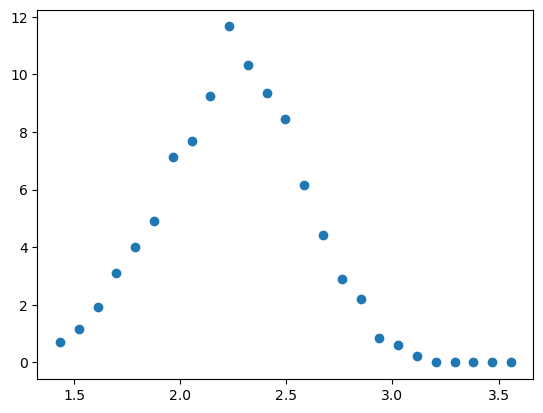

In [110]:
plt.scatter(logv,percent)

In [83]:
logv = df['logv'].to_numpy()
percent = df['outcome'].to_numpy()

In [111]:
logv_mu =np.mean(logv)
logv_sigma = np.std(logv)

In [112]:
normalization_factor = np.trapz(percent,logv)
print(normalization_factor)

8.558427595402218


In [113]:
percent = percent/normalization_factor

In [114]:
params, pcov = optimize.curve_fit(fit_norm,logv,percent)

Text(0.5, 1.0, 'Binary COM ejection velocity distribution')

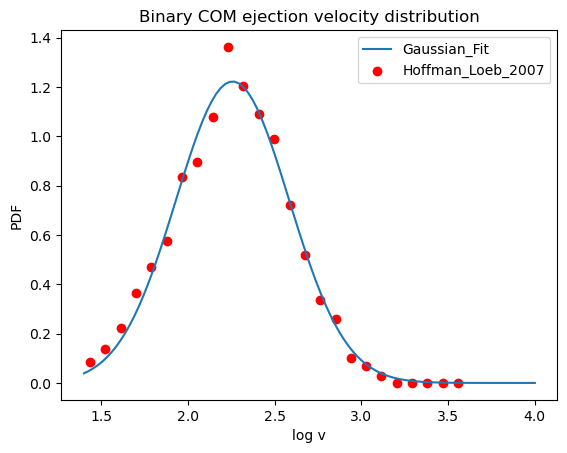

In [115]:
x_log = np.linspace(1.4,4,100)
plt.plot(x_log,fit_norm(x_log,params[0],params[1]),label="Gaussian_Fit")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.legend()
plt.xlabel("log v")
plt.ylabel("PDF")
plt.title("Binary COM ejection velocity distribution")

In [116]:
from scipy.stats import beta

In [118]:
beta.fit(percent)

(0.8930569023430867,
 1.3471506255529473,
 -2.5293413046540604e-31,
 1.3848474566878404)

In [150]:
#df_trip = pd.read_csv("Data/tripleBH_velocity.csv")
df_trip = pd.read_csv("Data/TripleBH_velocity_modified.csv")
df_trip.head()

,logv,outcome
0,1.397658,0.052632
1,1.468777,0.052632
2,1.487858,0.078947
3,1.555507,0.078947
4,1.578057,0.052632


In [154]:
logv = (df_trip['logv'][1::2].to_numpy() + df_trip['logv'][0::2].to_numpy())/2
percent = (df_trip['outcome'][::2].to_numpy() + df_trip['outcome'][1::2].to_numpy())/2
#logv = df_trip['logv'].to_numpy()
#percent = df_trip['outcome'].to_numpy()

In [156]:
normalization_factor = np.trapz(percent,logv)
print(normalization_factor)

8.696626649016299


In [157]:
percent = percent/normalization_factor

In [158]:
params, pcov = optimize.curve_fit(fit_norm,logv,percent)

Text(0.5, 1.0, 'Single BH ejection velocity distribution')

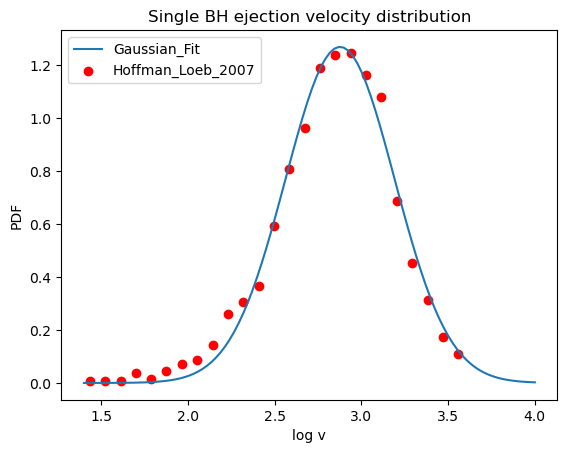

In [161]:
x_log = np.linspace(1.4,4,100)
plt.plot(x_log,fit_norm(x_log,params[0],params[1]),label="Gaussian_Fit")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.legend()
plt.xlabel("log v")
plt.ylabel("PDF")
plt.title("Single BH ejection velocity distribution")